In [25]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
#load dataset
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
#EDA
#Basic info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Gender                  200 non-null    int64  
 6   Cluster                 200 non-null    int32  
 7   PCA1                    200 non-null    float64
 8   PCA2                    200 non-null    float64
 9   TSNE1                   200 non-null    float32
 10  TSNE2                   200 non-null    float32
dtypes: float32(2), float64(2), int32(1), int64(5), object(1)
memory usage: 15.0+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Cluster,PCA1,PCA2,TSNE1,TSNE2
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.560000,2.015000,3.996803e-17,7.105427e-17,-0.052964,0.070884
std,57.879185,13.969007,26.264721,25.823522,0.497633,1.461319,1.163776e+00,1.026888e+00,5.726619,9.272606
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000,-2.148322e+00,-2.023945e+00,-10.532106,-14.636106
25%,50.750000,28.750000,41.500000,34.750000,0.000000,0.000000,-1.001755e+00,-7.861065e-01,-4.531682,-7.792323
50%,100.500000,36.000000,61.500000,50.000000,1.000000,2.000000,2.182288e-02,-4.510972e-02,0.935949,3.371248
75%,150.250000,49.000000,78.000000,73.000000,1.000000,3.000000,1.049600e+00,7.195342e-01,4.227658,7.285700
max,200.000000,70.000000,137.000000,99.000000,1.000000,4.000000,2.774286e+00,3.137256e+00,10.026087,14.241148


In [27]:
#check missing values and duplicates
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

<Axes: xlabel='Age', ylabel='Count'>

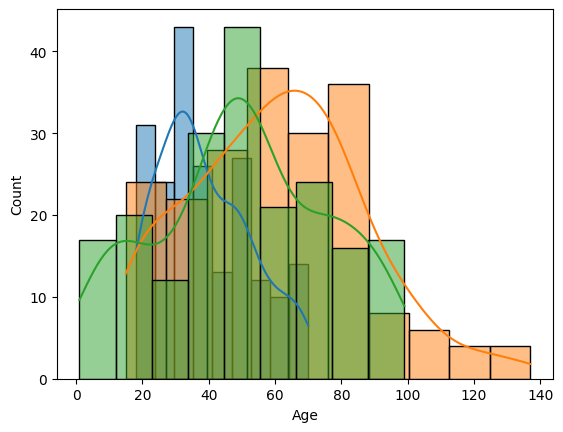

In [28]:
#Visualize Distributions
sns.histplot(df['Age'], kde=True)
sns.histplot(df['Annual Income (k$)'], kde=True)
sns.histplot(df['Spending Score (1-100)'], kde=True)


<Axes: xlabel='Genre', ylabel='count'>

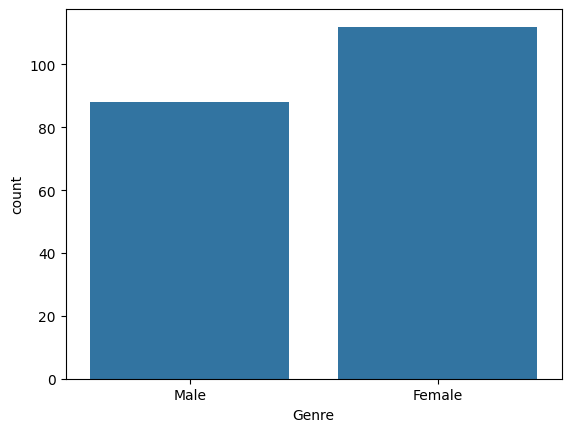

In [29]:
#gender distribution
sns.countplot(data=df, x='Genre')


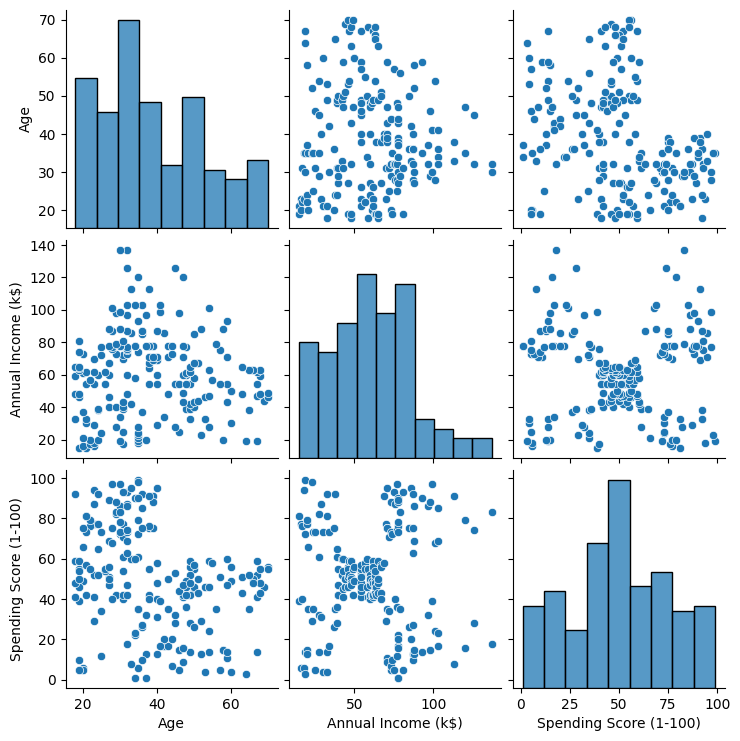

In [9]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [33]:
#Data Preprocessing for Clustering
#Encode Categorical Column (Gender)
df['Gender'] = df['Genre'].map({'Male': 0, 'Female': 1})


In [12]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


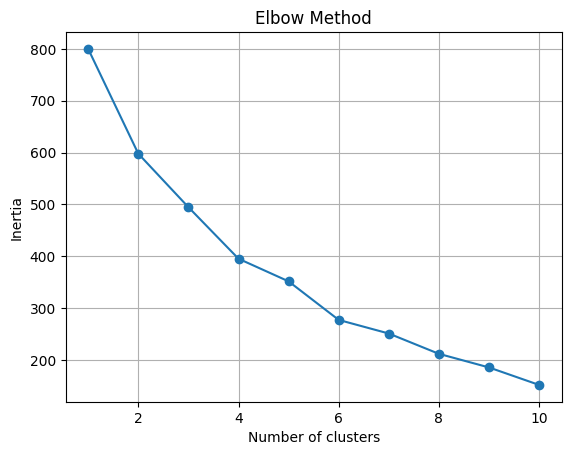

In [32]:
#Apply K-Means Clustering
#Find Optimal K using Elbow Method
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [31]:
#Apply K-Means (e.g., K=5 based on elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


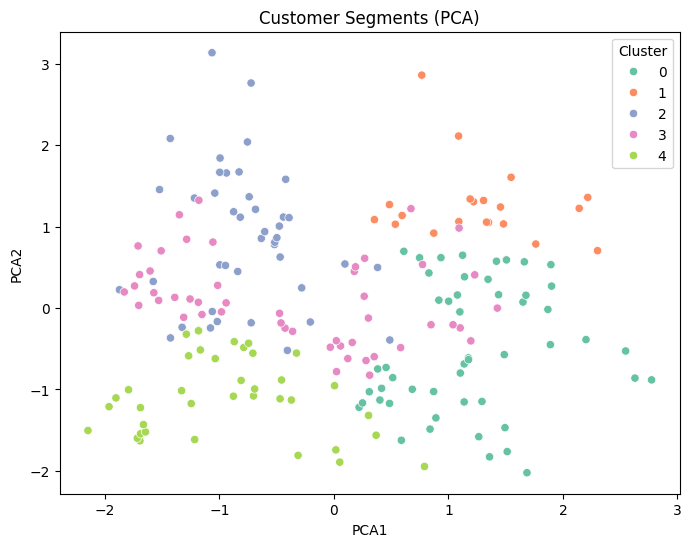

In [30]:
#PCA 2D plot
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Segments (PCA)')
plt.show()


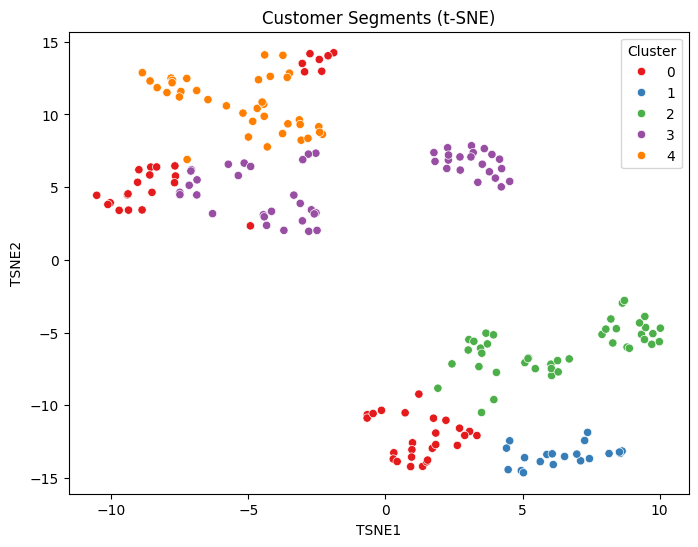

In [17]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments (t-SNE)')
plt.show()


In [18]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.470588,46.098039,39.313725
1,39.500000,85.150000,14.050000
2,28.690476,60.904762,70.238095
3,37.897959,82.122449,54.448980
4,27.315789,38.842105,56.210526


In [19]:
# View the average stats for each cluster
df.groupby('Cluster')[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.49,56.47,46.10,39.31
1,0.00,39.50,85.15,14.05
2,0.00,28.69,60.90,70.24
3,1.00,37.90,82.12,54.45
4,1.00,27.32,38.84,56.21


In [20]:
print("Cluster 0: Mid-aged, high income, low spending → Potential churn group")
print("Cluster 1: Young, low income, high spending → Impulsive buyers")
print("Cluster 2: High income, high spending → Loyal premium customers")
print("Cluster 3: Low income, low spending → Budget-conscious")
print("Cluster 4: Moderate income and spending → Regular shoppers")


Cluster 0: Mid-aged, high income, low spending → Potential churn group
Cluster 1: Young, low income, high spending → Impulsive buyers
Cluster 2: High income, high spending → Loyal premium customers
Cluster 3: Low income, low spending → Budget-conscious
Cluster 4: Moderate income and spending → Regular shoppers


In [23]:
#suggest strategies
strategies = {
    0: "Send personalized offers or build trust through email marketing to increase spending.",
    1: "Offer small discounts or cashback to encourage more purchases.",
    2: "Provide premium memberships, early access, and exclusive deals.",
    3: "Introduce referral programs and budget-friendly product bundles.",
    4: "Seasonal promotions and loyalty rewards to retain engagement."
}

# Show strategy for each cluster
for cluster, strategy in strategies.items():
    print(f"Cluster {cluster}: {strategy}")


Cluster 0: Send personalized offers or build trust through email marketing to increase spending.
Cluster 1: Offer small discounts or cashback to encourage more purchases.
Cluster 2: Provide premium memberships, early access, and exclusive deals.
Cluster 3: Introduce referral programs and budget-friendly product bundles.
Cluster 4: Seasonal promotions and loyalty rewards to retain engagement.
